# **Predicting tweet sentiment**

Dataset from https://www.kaggle.com/datasets/bhavikjikadara/tweets-dataset

**Context**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (0 = negative, 4 = positive) and can be used to detect sentiment.

**Content**

It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative and 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted.
* text: the text of the tweet.

## **1. Exploratory Data Analysis** 

In [94]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# text processing libraries
import re
import contractions

from collections import Counter




Pandas and Numpy have been used for data manipulation and numerical calculations

Matplotlib and Seaborn have been used for data visualizations

In [95]:
# import data   
tweets = pd.read_csv(".//data//tweets.csv", encoding="latin-1")

In [96]:
# check the shape of the dataframe
print("Shape of the dataframe:", tweets.shape)

Shape of the dataframe: (1048575, 6)


In [97]:
# display the first few rows of the dataframe
tweets.head()

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [98]:
# display the last few rows of the dataframe
tweets.tail()

,Target,ID,Date,flag,User,Text
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048574,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [99]:
# display information about data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1   ID      1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   flag    1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [100]:
# check for duplication
tweets.nunique()

Target          2
ID        1048044
Date       662453
flag            1
User       511366
Text      1036135
dtype: int64

In [101]:
# check for missing values
tweets.isnull().sum()

Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

In [102]:
# summary statistics of numerical columns
tweets.describe()

,Target,ID
count,1.048575e+06,1.048575e+06
mean,9.482431e-01,1.976166e+09
std,1.701120e+00,2.300580e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990869e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


**Data reduction**

Some columns or variables can be dropped if they do not add value to our analysis

In our dataset, columns ID, Date, flag, User don’t have any predictive power to predict the dependent variable

In [103]:
data = tweets.drop(['ID', 'Date', 'flag', 'User'], axis = 'columns')
data

,Target,Text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1048570,4,My GrandMa is making Dinenr with my Mum
1048571,4,Mid-morning snack time... A bowl of cheese noo...
1048572,4,@ShaDeLa same here say it like from the Termi...
1048573,4,@DestinyHope92 im great thaanks wbuu?


**Data cleaning**

Some names of the variables are not relevant and not easy to understand

Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data

In [104]:
# adjusting target values
data['Target'] = data['Target'].replace(4, 1)
data

,Target,Text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1048570,1,My GrandMa is making Dinenr with my Mum
1048571,1,Mid-morning snack time... A bowl of cheese noo...
1048572,1,@ShaDeLa same here say it like from the Termi...
1048573,1,@DestinyHope92 im great thaanks wbuu?


In [105]:
# removing unnecessary user tags
data['Text'] = data['Text'].replace(r"@\w+", "", regex=True)
data


,Target,Text
0,0,is upset that he can't update his Facebook by ...
1,0,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire
3,0,"no, it's not behaving at all. i'm mad. why am..."
4,0,not the whole crew
...,...,...
1048570,1,My GrandMa is making Dinenr with my Mum
1048571,1,Mid-morning snack time... A bowl of cheese noo...
1048572,1,same here say it like from the Terminiator m...
1048573,1,im great thaanks wbuu?


In [106]:
# resolving contractions (and slang)
data['Text'] = data['Text'].apply(lambda x: contractions.fix(x))
data

,Target,Text
0,0,is upset that he cannot update his Facebook by...
1,0,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire
3,0,"no, it is not behaving at all. i am mad. why ..."
4,0,not the whole crew
...,...,...
1048570,1,My GrandMa is making Dinenr with my Mum
1048571,1,Mid-morning snack time... A bowl of cheese noo...
1048572,1,same here say it like from the Terminiator m...
1048573,1,i am great thaanks wbuu?


**Visualization**

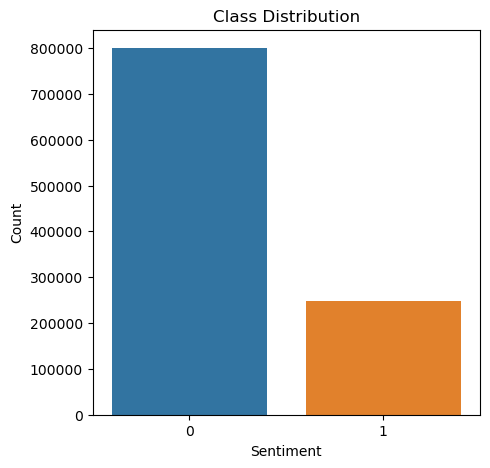

In [107]:
# visualize class distribution
plt.figure(figsize=(5, 5))
sns.countplot(x = 'Target' , data = data)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

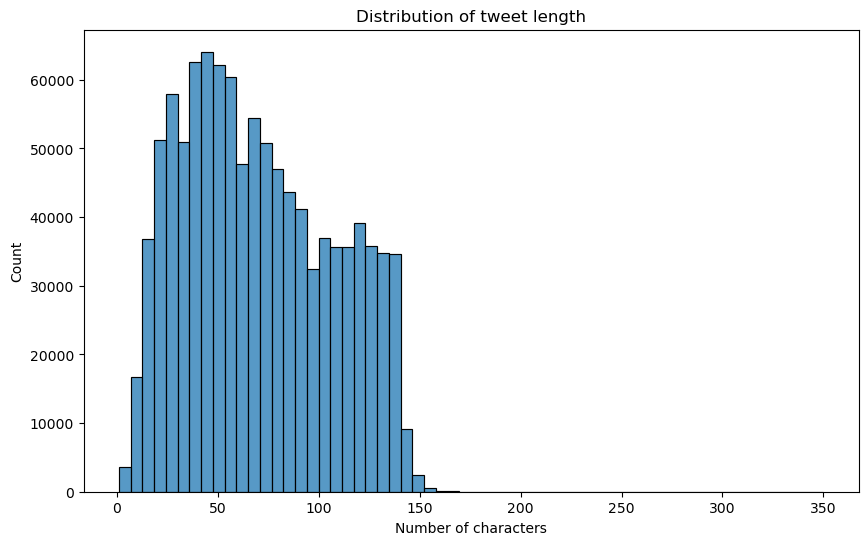

In [108]:
# explore tweet length
data['characters'] = data['Text'].apply(lambda x: len(x))

# visualize tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(data['characters'], bins = 60)
plt.title('Distribution of tweet length')
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

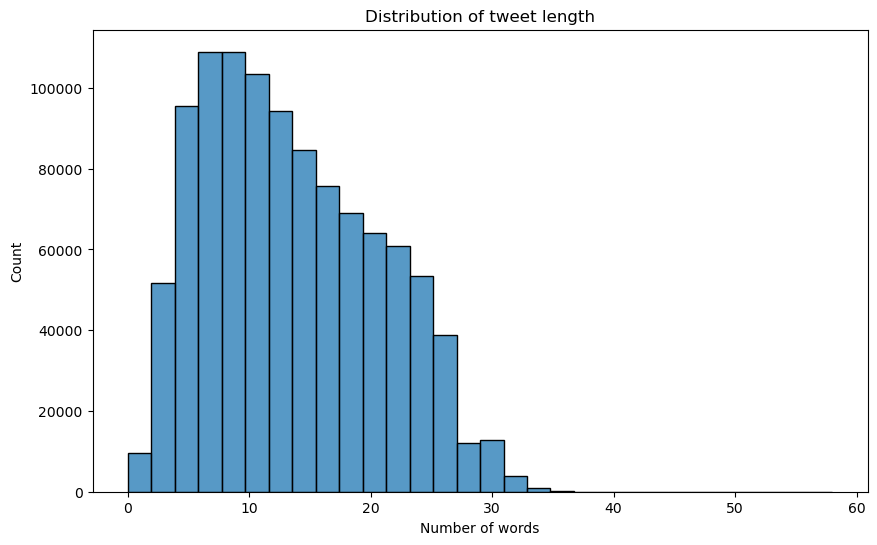

In [109]:
# explore tweet length
data['words'] = data['Text'].apply(lambda x: len(x.split()))

# visualize tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(data['words'], bins = 30)
plt.title('Distribution of tweet length')
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

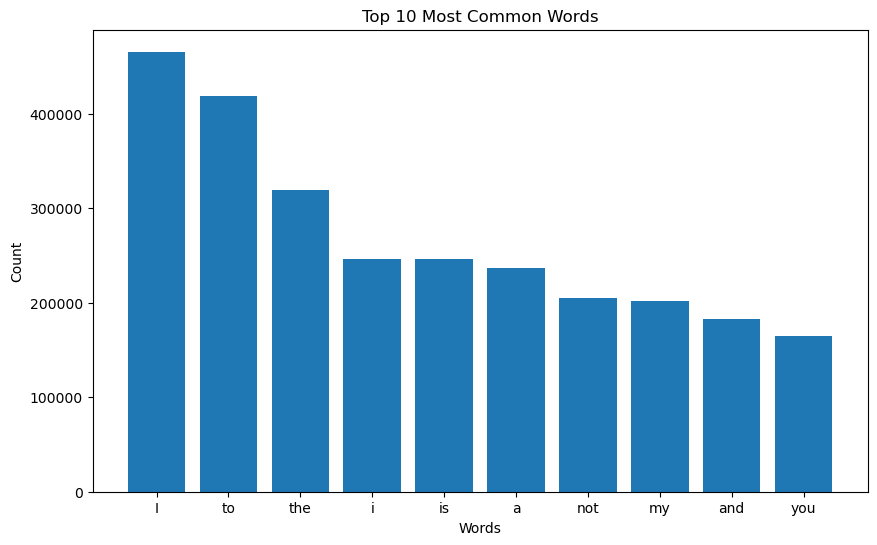

In [110]:

# combine all the text into a single string
all_text = ' '.join(data['Text'])

# split the text into individual words
words = all_text.split()

# count the frequency of each word
word_counts = Counter(words)

# get the top 10 most common words
top_10_words = word_counts.most_common(10)

# extract the words and their counts
top_10_words, top_10_counts = zip(*top_10_words)

# plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_words, top_10_counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


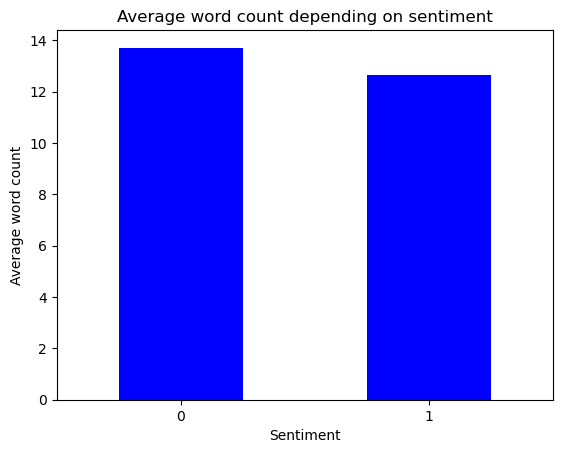

In [111]:
# average word count depending on sentiment

df = data.groupby("Target").words.agg("mean")

df.plot(kind = 'bar', color = 'blue')

plt.title('Average word count depending on sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average word count')
plt.xticks(rotation = 0)  
plt.show()

In [112]:
# is # in tweet?

data['has_hashtag'] = tweets['Text'].str.contains(r'#\w+')
data

,Target,Text,characters,words,has_hashtag
0,0,is upset that he cannot update his Facebook by...,112,21,False
1,0,I dived many times for the ball. Managed to s...,80,17,False
2,0,my whole body feels itchy and like its on fire,47,10,False
3,0,"no, it is not behaving at all. i am mad. why ...",98,22,False
4,0,not the whole crew,20,4,False
...,...,...,...,...,...
1048570,1,My GrandMa is making Dinenr with my Mum,40,8,False
1048571,1,Mid-morning snack time... A bowl of cheese noo...,57,9,False
1048572,1,same here say it like from the Terminiator m...,85,16,False
1048573,1,i am great thaanks wbuu?,26,5,False


In [113]:
# is hashtag present in negatives tweets?

data[data['Target'] == 0]['has_hashtag'].value_counts().apply(lambda x: x / len(data[data['Target'] == 0]) * 100)


False    98.098373
True      1.901627
Name: has_hashtag, dtype: float64

In [114]:
# is hashtag present in positives tweets?

data[data['Target'] == 1]['has_hashtag'].value_counts().apply(lambda x: x / len(data[data['Target'] == 1]) * 100)

False    97.43861
True      2.56139
Name: has_hashtag, dtype: float64

In [115]:
# is "not" in tweet?

data['has_not'] = data['Text'].str.contains('not')
data

,Target,Text,characters,words,has_hashtag,has_not
0,0,is upset that he cannot update his Facebook by...,112,21,False,True
1,0,I dived many times for the ball. Managed to s...,80,17,False,False
2,0,my whole body feels itchy and like its on fire,47,10,False,False
3,0,"no, it is not behaving at all. i am mad. why ...",98,22,False,True
4,0,not the whole crew,20,4,False,True
...,...,...,...,...,...,...
1048570,1,My GrandMa is making Dinenr with my Mum,40,8,False,False
1048571,1,Mid-morning snack time... A bowl of cheese noo...,57,9,False,False
1048572,1,same here say it like from the Terminiator m...,85,16,False,False
1048573,1,i am great thaanks wbuu?,26,5,False,False


In [116]:
# is "not" present in negatives tweets?

data[data['Target'] == 0]['has_not'].value_counts().apply(lambda x: x / len(data[data['Target'] == 0]) * 100)

False    72.216215
True     27.783785
Name: has_not, dtype: float64

In [117]:
# is "not" present in positives tweets?

data[data['Target'] == 1]['has_not'].value_counts().apply(lambda x: x / len(data[data['Target'] == 1]) * 100)

False    87.020469
True     12.979531
Name: has_not, dtype: float64

In [118]:
# Extract hour from the Date column

data['Hour'] = pd.to_datetime(tweets['Date']).dt.hour


c:\Users\flang\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


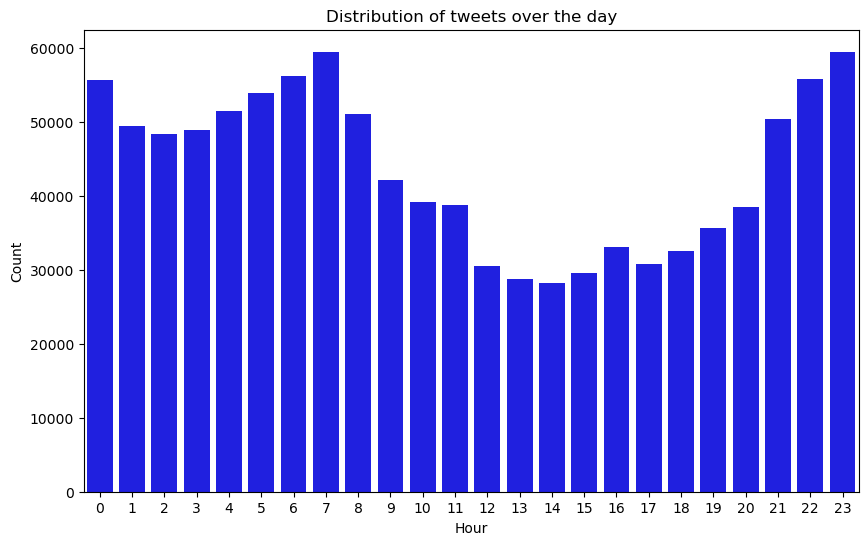

In [119]:
# visualize the distribution of tweets over the day

plt.figure(figsize=(10, 6))
sns.countplot(x = 'Hour', data = data, color = 'blue')
plt.title('Distribution of tweets over the day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


<Figure size 1500x600 with 0 Axes>

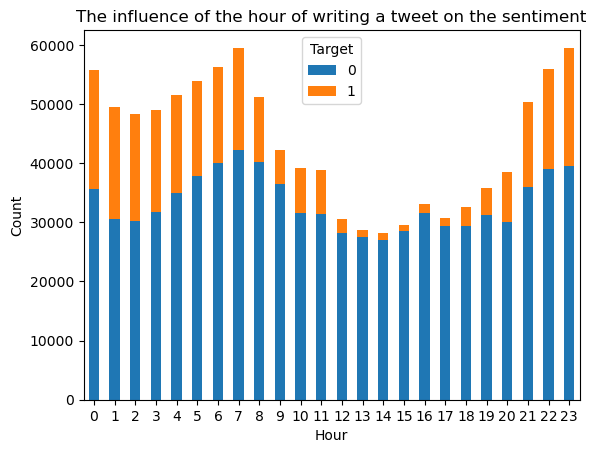

In [120]:
# visualize the the influence of the hour of writing a tweet on the Target variable
hourly_target_counts = data.groupby('Hour')['Target'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(15, 6))
hourly_target_counts.plot(kind='bar', stacked=True)

plt.title('The influence of the hour of writing a tweet on the sentiment')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation = 0)  

plt.show()

## **2. Feature engineering** 

## **3. Preparation of training and test sets**

In [121]:

clean_data = data[['Text', 'Target']] 
clean_data

,Text,Target
0,is upset that he cannot update his Facebook by...,0
1,I dived many times for the ball. Managed to s...,0
2,my whole body feels itchy and like its on fire,0
3,"no, it is not behaving at all. i am mad. why ...",0
4,not the whole crew,0
...,...,...
1048570,My GrandMa is making Dinenr with my Mum,1
1048571,Mid-morning snack time... A bowl of cheese noo...,1
1048572,same here say it like from the Terminiator m...,1
1048573,i am great thaanks wbuu?,1


In [122]:
x_train, x_test, y_train, y_test = train_test_split(
    clean_data[clean_data.columns.values[:-1]], # X
    clean_data[clean_data.columns.values[-1]], # y
    test_size=0.33, random_state=42)

In [123]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((702545, 1), (346030, 1), (702545,), (346030,))

## **4. Modeling and validation**